In [ ]:
#@title GitHub Token Ekle

import ipywidgets as widgets
from IPython.display import display
import os

def github_token_button_clicked(b):
    os.environ["GITHUB_TOKEN"] = "YOUR_GITHUB_TOKEN_HERE"
    print("GitHub Token ortam değişkenine eklendi!")

button1 = widgets.Button(
    description="GitHub Token Ekle",
    button_style='',
    tooltip='GitHub Token Ortam Değişkenine Ekle'
)
button1.on_click(github_token_button_clicked)
display(button1)

Button(description='GitHub Token Ekle', style=ButtonStyle(), tooltip='GitHub Token Ortam Değişkenine Ekle')

GitHub Token ortam değişkenine eklendi!


In [ ]:
#@title GitHub Token Ekle

import ipywidgets as widgets
import os
import datetime
from google.colab import drive
from IPython.display import display

def sync_drive_github(b):
    # Google Drive'ı bağla
    drive.mount('/content/drive', force_remount=True)

    # Git kullanıcı bilgilerini ayarla
    os.system('git config --global user.email "doganzub@gmail.com" > /dev/null 2>&1')
    os.system('git config --global user.name "doganzub" > /dev/null 2>&1')

    # GitHub Token kontrolü
    GITHUB_TOKEN = os.environ.get("GITHUB_TOKEN")
    if not GITHUB_TOKEN:
        print("❌ HATA: GitHub Token bulunamadı! Lütfen önce Buton 1 ile ayarlayın.")
        return

    # GitHub repo bağlantısı
    GITHUB_REPO = f"https://{GITHUB_TOKEN}@github.com/doganzub/ml.git"

    # Çalıştırılan notebook'un yolu ve adı (manuel düzenleyin)
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/"
    running_notebook = "4_basit_dogReg_gelir_mutluluk.ipynb"

    # Repo yoksa klonla
    if not os.path.exists("/content/ml"):
        os.system(f"cd /content && git clone {GITHUB_REPO}")

    # Git dizinine geç
    os.chdir("/content/ml")

    # Branch listesini al
    os.system("git fetch --all")
    existing_branches = os.popen("git branch -r").read()

    filename_parts = running_notebook.split("_")
    if not filename_parts[0].isdigit():
        print(f"🚫 {running_notebook} dosyasının başında rakam yok, işlem iptal edildi!")
    else:
        ders_no = filename_parts[0]
        branch_name = f"ders{ders_no}"

        if f"origin/{branch_name}" not in existing_branches:
            print(f"🚫 {branch_name} branch'i GitHub'da bulunamadı, işlem iptal edildi!")
        else:
            os.system(f"git checkout {branch_name}")
            os.system(f'cp "{notebook_path}{running_notebook}" "/content/ml/"')
            commit_message = f"{running_notebook} güncellendi - {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}"
            os.system("git add .")
            status = os.popen("git status --porcelain").read()

            if status.strip():
                os.system(f'git commit -m "{commit_message}"')
                os.system(f"git push origin {branch_name}")
                print(f"✅ {running_notebook} {branch_name} branch'ine yüklendi!")
            else:
                print(f"⚡ {running_notebook} için değişiklik yok, commit atlanıyor!")
            os.system(f'cp -f "/content/ml/{running_notebook}" "{notebook_path}"')

    print("🎯 GitHub ve Google Drive senkronize edildi!")

# Buton 2: Drive & GitHub Senkronizasyonu
button2 = widgets.Button(
    description="Drive & GitHub Senkronizasyonu",
    button_style='',
    tooltip='Google Drive ve GitHub arasında senkronizasyon yap'
)
button2.on_click(sync_drive_github)
display(button2)

Button(description='Drive & GitHub Senkronizasyonu', style=ButtonStyle(), tooltip='Google Drive ve GitHub aras…

Mounted at /content/drive
✅ 4_basit_dogReg_gelir_mutluluk.ipynb ders4 branch'ine yüklendi!
🎯 GitHub ve Google Drive senkronize edildi!


# Basit Doğrusal Regresyon: Gelir ve Mutluluk İlişkisi

Bu projede, bireylerin yıllık gelir düzeyi ile öznel mutluluk puanları arasındaki ilişki, **basit doğrusal regresyon analizi** yöntemiyle incelenmiştir. Analiz süreci; veri ön işleme, keşifsel veri analizi, model kurma, performans değerlendirme ve sonuçların grafiksel sunumu olmak üzere beş temel adımdan oluşmaktadır.

Veriler 498 bireye ait gelir ile mutluluk düzeylerini içeren hayali bir veri setinden elde edilmiştir. Amaç, gelir düzeyinin mutluluğu ne ölçüde açıkladığını regresyon modeli ile test etmek ve bu doğrusal ilişkinin gücünü ortaya koymaktır.

---

## Teorik Temeller: Basit Doğrusal Regresyon

Basit doğrusal regresyon, bir **bağımsız değişken (X)** ile bir **bağımlı değişken (Y)** arasındaki doğrusal ilişkiyi analiz etmeye yarayan istatistiksel bir yöntemdir. Model, iki değişken arasındaki ilişkiyi bir doğru (lineer denklem) aracılığıyla temsil eder ve bu sayede bağımsız değişkenin bilinen bir değeri üzerinden bağımlı değişkenin tahmini yapılabilir.

### Modelin Matematiksel Gösterimi:


```
Y = β₀ + β₁ * X + ε
```


- **Y**: Bağımlı değişken (örneğin, mutluluk puanı)  
- **X**: Bağımsız değişken (örneğin, gelir düzeyi)  
- **β₀**: Sabit terim (intercept); X = 0 iken Y’nin tahmini değeri  
- **β₁**: Eğim katsayısı; X’teki bir birimlik değişimin Y üzerindeki etkisi  
- **ε**: Hata terimi; modele dahil edilemeyen rastlantısal sapmaları ifade eder  

Modelin temel amacı, iki değişken arasındaki ilişkinin:

- **Yönünü** (pozitif ya da negatif),  
- **Gücünü** (korelasyonun derecesi)  
- Ve **istatistiksel anlamlılığını** (p-değeri) ortaya koymaktır.  

Ayrıca modelin veri üzerindeki açıklayıcılığı **R² katsayısı** ile değerlendirilir. R² değeri, modelin bağımlı değişkendeki toplam varyansın ne kadarını açıkladığını gösterir.

---

## 🔍 Neden Bu Çalışmayı Yapıyoruz?

Bu çalışma, sosyal bilimlerde sıkça karşılaşılan ekonomik refah ve öznel iyi oluş arasındaki ilişkiyi **ampirik verilerle** analiz etmeyi hedeflemektedir. Özellikle "gelir mutluluğu etkiler mi?" sorusu; kamu politikaları, bireysel tercih davranışları ve yaşam doyumu araştırmaları açısından kritik bir yere sahiptir.

Bu analiz çerçevesinde şu temel sorulara yanıt aranacaktır:

- Gelir ile mutluluk arasında **istatistiksel olarak anlamlı bir ilişki** var mıdır?  
- Bu ilişkinin **yönü ve büyüklüğü** nedir?  
- Gelir düzeyi bilinen bir bireyin mutluluk puanı **ne ölçüde tahmin edilebilir?**  
- Kurulan model, farklı örneklemler için **ne kadar genellenebilir?**  

Bu yönüyle çalışma, sosyal bilimsel araştırmalarda **nicel analiz tekniklerinin** nasıl uygulanabileceğini örneklemekte ve doğrusal regresyon modelinin gerçek dünya verileriyle kullanımını göstermektedir.


---

## 📁 Veri Seti Hakkında

Bu çalışmada kullanılan veri seti ([income.data.csv](https://www.scribbr.com/wp-content/uploads/2020/02/income.data_.zip)), Bevans (2023b) tarafından sunulan 500 kişilik hayali bir örneklemden oluşmaktadır. Veri setinde üç sütun bulunmaktadır:

| Nitelik Adı     | Türkçesi             | Veri Tipi |
|----------------|----------------------|-----------|
| Unnamed: 0     | Örnek numarası        | Ayrık     |
| income         | Gelir (bin $)         | Sürekli   |
| happiness      | Mutluluk puanı (1–10) | Sürekli   |

**Değişken Açıklamaları:**

- `income`: Bireylerin yıllık gelirleri, 15.000 ile 75.000 arasında değişmektedir. Bu değerler, analiz kolaylığı için 10.000’e bölünmüş (örneğin, 30.000 → 3.0) ve normalize edilmiştir.
- `happiness`: 1 ile 7 arasında derecelendirilen, bireylerin öznel mutluluk düzeyini ifade eden puanlardır.
- `Unnamed: Her bireyin örnek numarasını içeren sütundur; analiz dışında bırakılmıştır.

> Bu çalışmada yalnızca `income` ve `happiness` değişkenleri kullanılmıştır. Gelir, **bağımsız değişken** (predictor); mutluluk ise **bağımlı değişken** (target) olarak modellenmiştir.

---

## 🧪 Uygulama Süreci ve Analiz Aşamaları

### 1️⃣ Gerekli Kütüphanelerin Yüklenmesi
- `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, `sklearn` gibi analiz ve görselleştirme kütüphaneleri içe aktarılmıştır.

### 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz
- CSV dosyası yüklenmiş, ilk sütun çıkarılmış ve değişkenler Türkçeleştirilmiştir.  
- Dağılım, aykırı değerler ve eksik veri kontrolü yapılmış; scatter plot, box plot ve histogram ile görselleştirme sağlanmıştır.  
- Pearson korelasyon analizi yapılmıştır.

### 3️⃣ Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme
- Veri seti %70 eğitim, %30 test olarak ayrılmıştır.  
- `statsmodels` ile regresyon modeli oluşturulmuş ve model özeti alınmıştır.  
- Regresyon denklemi elde edilmiş ve katsayılar, p-değerleri, R² katsayısı değerlendirilmiştir.

### 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

- Aşağıdaki hata metrikleri hem manuel hem sklearn ile hesaplanmıştır:

| Metrik   | Tanım ve Yorum                                                                 |
|:--------:|:-------------------------------------------------------------------------------|
| **MAE**  | Ortalama mutlak sapma. Tahminlerin gerçek değerlerden ortalama ne kadar saptığını gösterir.                  |
| **MSE**  | Ortalama karesel sapma. Büyük hataları vurgular; sapmaların karelerinin ortalamasıdır.                       |
| **RMSE** | MSE’nin karekökü. Hataların gerçek birimdeki ortalama büyüklüğünü ifade eder; büyük sapmalardan daha fazla etkilenir. |

---

### 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi
- Gerçek değerler scatter plot ile, tahmin edilen değerler regresyon doğrusu olarak çizilmiştir.  
- Grafiksel sunum ile modelin başarı düzeyi görsel olarak değerlendirilmiştir.




---



---



---



## 1️⃣ Gerekli Kütüphaneler

In [ ]:
import numpy as np                         # Sayısal işlemler için
import pandas as pd                        # Veri okuma ve düzenleme
import seaborn as sns                      # Veri görselleştirme
import matplotlib.pyplot as plt            # Grafik çizimi
from matplotlib.cbook import boxplot_stats # Aykırı değer tespiti için

from scipy.stats import pearsonr           # Korelasyon analizi
import statsmodels.formula.api as smf      # Regresyon modeli oluşturmak için
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Hata metrikleri

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")


✅ Gerekli kütüphaneler başarıyla yüklendi.


## 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz

---

Bu bölümde, analizimizde kullanacağımız `income.data.csv` adlı veri seti Google Drive'dan okunarak yüklenmekte ve ilk aşamada veri temizleme, isimlendirme, özet istatistikler ve görselleştirmeler gerçekleştirilmektedir. Ayrıca, temel veri kontrolleri (eksik veri, aykırı değer ve korelasyon analizi) de bu aşamada yapılır. Bu adımlar, ileride kurulacak olan doğrusal regresyon modelinin sağlıklı ve anlamlı sonuçlar vermesi için ön koşuldur.

---

### Income & Happiness Veri Seti: Tanıtım

**Income & Happiness** veri seti, bireylerin **yıllık gelir düzeyi** ile **öznel mutluluk puanları** arasındaki ilişkiyi analiz etmek üzere oluşturulmuş, 500 gözlemden oluşan eğitim amaçlı bir veri setidir. Sade yapısı sayesinde hem ekonomik hem psikolojik veri analizlerinde örnek modelleme çalışmaları için ideal bir kaynak sunar.

#### Veri seti şu alanları içermektedir:

| Sütun Adı     | Açıklama                                                | Veri Tipi |
|--------------|----------------------------------------------------------|-----------|
| Unnamed: 0   | Gözlem numarası (analize dahil edilmez)                 | Ayrık     |
| income       | Yıllık gelir (bin $ cinsinden, 10.000'e bölünmüş hali)   | Sürekli   |
| happiness    | 1 ile 10 arasında öznel mutluluk puanı                   | Sürekli   |

- **income:** Örneğin 3.5 değeri, 35.000 $ yıllık gelire karşılık gelir. Gelir değerleri, 10.000’e bölünerek normalleştirilmiştir.
- **happiness:** 1 (çok mutsuz) ile 10 (çok mutlu) arasında bireylerin kendi beyan ettikleri mutluluk düzeyini ifade eder.
- **Unnamed: 0:** Gözlem sırasını temsil eden sütundur ve analiz dışında tutulur.

🔗 [Veri seti kaynağı – Bevans, 2023](https://www.scribbr.com/wp-content/uploads/2020/02/income.data_.zip)  
📄 **Kullanılan dosya:** `income.data.csv`

> Bu çalışmada yalnızca `income` ve `happiness` sütunları kullanılacaktır. Regresyon modelinde **income** bağımsız değişken, **happiness** bağımlı değişken olarak tanımlanmıştır.








Mounted at /content/drive
Veri setinin ilk 6 satırı:


,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
5,6,3.729643,2.458556


Temel istatistikler:


,Unnamed: 0,gelir,mutluluk
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


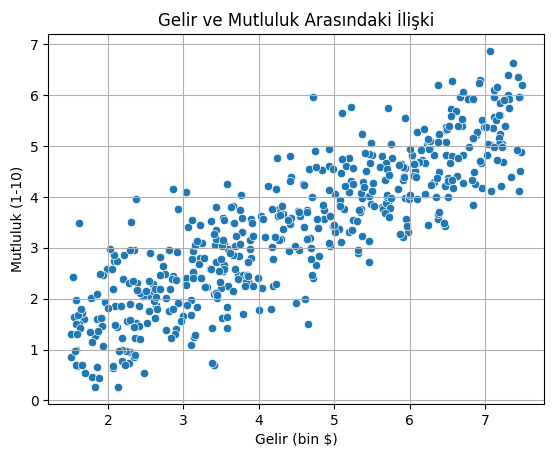

Aykırı Değerler (gelir): []
Eksik Değer Kontrolü:
Unnamed: 0    0
gelir         0
mutluluk      0
dtype: int64
📈 Pearson Korelasyon Katsayısı: 0.8656
📊 p-değeri: 0.0000


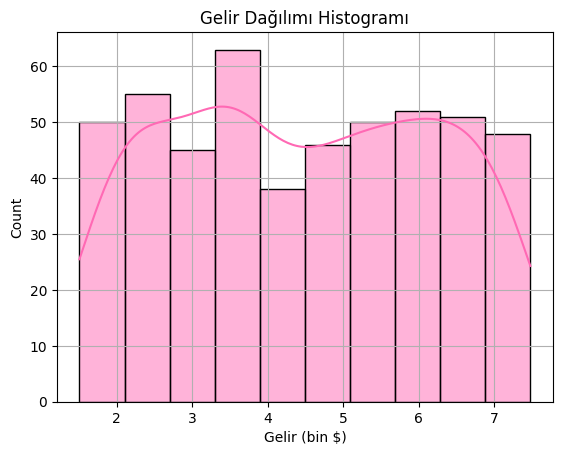

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1) Google Drive'dan veri setini içe aktarıyoruz
# pd.read_csv() → CSV dosyasını DataFrame olarak okur
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/income.data.csv'
veriseti = pd.read_csv(dosya_yolu)

# 2) Veri setinin ilk 6 satırını gözlemleyerek genel yapıyı kontrol ediyoruz
# .head(n) → ilk n satırı gösterir; display() daha okunabilir bir formatta yazdırır
print("Veri setinin ilk 6 satırı:")
display(veriseti.head(6))

# 3) Sütun adları daha anlaşılır ve Türkçeleştirilmiş hale getirilir
# .rename(columns={...}) → sütun adlarını değiştirir
veriseti = veriseti.rename(columns={"income": "gelir", "happiness": "mutluluk"})

# 4) Sayısal değişkenlerin temel istatistiksel özetini alıyoruz
# .describe() → ortalama, min, max, standart sapma vb. özet bilgileri verir
print("Temel istatistikler:")
display(veriseti.describe())

# 5) Gelir ve mutluluk arasındaki ilişkiyi scatter plot (dağılım grafiği) ile görselleştiriyoruz
# sns.scatterplot() → iki sayısal değişkenin ilişkisinin nokta grafiği
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="gelir", y="mutluluk", data=veriseti)
plt.title("Gelir ve Mutluluk Arasındaki İlişki")  # Grafik başlığı
plt.xlabel("Gelir (bin $)")                       # X ekseni etiketi
plt.ylabel("Mutluluk (1-10)")                     # Y ekseni etiketi
plt.grid(True)                                    # Kılavuz çizgileri
plt.show()

# 6) Aykırı değer ve eksik değer kontrolü yapıyoruz
# boxplot_stats() → çeyrek değerlere göre uç (fliers) değerleri belirler
from matplotlib.cbook import boxplot_stats
print("Aykırı Değerler (gelir):", boxplot_stats(veriseti["gelir"])[0]["fliers"])

# .isnull().sum() → her sütundaki eksik (NaN) değerlerin sayısını listeler
print("Eksik Değer Kontrolü:")
print(veriseti.isnull().sum())

# 7) Gelir ile mutluluk arasındaki korelasyonu (ilişki gücü ve yönü) ölçüyoruz
# pearsonr() → iki değişken arasında Pearson korelasyon katsayısını ve p-değerini döner
from scipy.stats import pearsonr
corr, p_value = pearsonr(veriseti["gelir"], veriseti["mutluluk"])
print(f"📈 Pearson Korelasyon Katsayısı: {corr:.4f}")   # İlişkinin yönü ve gücü   # f float sayıyı virgülden sonra 4 basamak
print(f"📊 p-değeri: {p_value:.4f}")                    # Anlamlılık düzeyi.       # f float sayıyı virgülden sonra 4 basamak

# 8) Gelir değişkeninin dağılımını histogram ile gösteriyoruz
# sns.histplot() → frekans dağılımı; kde=True → yoğunluk eğrisi
sns.histplot(data=veriseti, x="gelir", color="hotpink", kde=True)
plt.title("Gelir Dağılımı Histogramı")
plt.xlabel("Gelir (bin $)")
plt.grid(True)
plt.show()


## Veri Setinin Genel Yapısı ve İlk Gözlemler

Bu bölümde gelir (`gelir`) ve mutluluk (`mutluluk`) değişkenlerinden oluşan veri setinin temel yapısı, tanımlayıcı istatistikleri ve görsel incelemeleri sunulmuştur.

| Ölçüt        | Gelir (gelir) | Mutluluk (mutluluk) |
|--------------|---------------|----------------------|
| Gözlem Sayısı| 498           | 498                  |
| Ortalama     | 4.47          | 3.39                 |
| Std. Sapma   | 1.74          | 1.43                 |
| Minimum      | 1.51          | 0.27                 |
| Medyan       | 4.42          | 3.47                 |
| Maksimum     | 7.48          | 6.86                 |

---

### Gözlemler:

- **Dengeli Dağılım:** Ortalama ile medyanın yakınlığı, gelir ve mutluluk değerlerinin simetrik olduğunu göstermektedir.
- **Aykırı Değer Yok:** Boxplot analizinde uç değer gözlenmemiştir.
- **Eksik Veri Yok:** Her iki değişkende de eksik gözlem bulunmamaktadır.
- **Histogram Yorumu:** Gelir dağılımı oldukça dengeli ve orta gelir grubunda yoğunlaşmaktadır.

---

## Scatter Plot: Gelir ve Mutluluk Arasındaki İlişki

- **Pozitif Doğrusal İlişki:** Noktalar yukarı doğru bir eğilim göstermekte, bu da gelir arttıkça mutluluğun arttığını göstermektedir.
- **Veri Dengeli:** Gözlemler grafik alanına eşit dağılmış, kümelenme veya sapma yoktur.





---



---



---



## 3️⃣ Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme

---

Bu bölümde, veri setindeki **gelir (bin $)** değişkeni ile **mutluluk (1–7 arası puan)** değişkeni arasındaki ilişki, **basit doğrusal regresyon modeli** ile analiz edilmiştir. Modelin kurulması, parametrelerin tahmin edilmesi ve sonuçların yorumlanması bu adımda gerçekleştirilmiştir.

---

### Regresyon Modeli Nedir?

Basit doğrusal regresyon, bir bağımsız değişkenin (X) bir bağımlı değişken (Y) üzerindeki doğrusal etkisini analiz etmeye yarayan temel bir istatistiksel modeldir. Bu çalışmada:

- **Bağımsız değişken (X):** Gelir (bin $)  
- **Bağımlı değişken (Y):** Mutluluk (1–7 arası)  

olarak belirlenmiştir.

Modelin matematiksel ifadesi:

```
mutluluk = β₀ + β₁ * gelir + ε

```

Burada:

- **β₀ (sabit terim):** Gelir sıfırken modelin öngördüğü mutluluk değeri  
- **β₁ (eğim katsayısı):** Gelirdeki her 1 birimlik artışın mutluluk üzerindeki ortalama etkisi  
- **ε (hata):** Modelin açıklayamadığı rastlantısal sapmalardır

---

### Regresyon Sonuçları

Aşağıdaki sonuçlar, `income.data.csv` veri seti üzerinden elde edilmiştir:

- **Regresyon denklemi:**  
```
mutluluk = 0.28 + 0.708 × gelir
```

- **Sabit terim (β₀):** 0.28  
- **Eğim katsayısı (β₁):** 0.708
- **p-değeri (β₁ için):** < 0.0001 → katsayı istatistiksel olarak anlamlı  
- **R² (determinasyon katsayısı):** 0.75 → model, mutluluk değişkenindeki varyansın %75’ünü açıklamaktadır

---

### Yorum

- Gelir arttıkça mutluluk puanı da artmaktadır. Bu ilişki **pozitif yönlü** ve **istatistiksel olarak anlamlıdır**.  
- R² değeri orta düzeyde açıklayıcılığa işaret etmektedir.  
- Gelir bilgisiyle mutluluk tahmini yapılabilir ancak modelin hata payı, maaş modeline kıyasla biraz daha yüksektir.



---
---
---

In [ ]:
# KÜTÜPHANE AÇIKLAMASI:
# statsmodels → istatistiksel modeller kurmak için kullanılan bir Python kütüphanesidir.
# formula.api modülü (smf), R diline benzer şekilde formül yazarak modeller kurmamıza olanak tanır.

# OLS ((Ordinary Least Squares - en küçük kareler)
    # bir doğru çizerek iki değişken arasındaki ilişkiyi modellemeye çalışır.
    # Bu doğru öyle seçilir ki verideki noktalarla bu doğrunun arasındaki mesafe (hata) en küçük olsun.
import statsmodels.formula.api as smf


# 1) Veri setini %70 eğitim, %30 test olarak ayırıyoruz
    # Amaç: Modelin bir kısmını eğitim için, diğer kısmını test için kullanmak
    # sample(): Veriden rastgele bir kısmı seçmek için kullanılır
    # frac=0.7 → verinin %70’i alınır
    # replace=False → tekrar eden örnekler alınmaz
    # random_state=1 → her çalıştırmada aynı örnekler seçilsin diye sabitlenir
egitim = veriseti.sample(frac=0.7, replace=False, random_state=1)  # Eğitim veri seti

# veriseti.index.isin(...) → eğitimdeki satırların indekslerini bulur
ind = veriseti.index.isin(egitim.index)   # Eğitim verisine ait indeksler

# ~ind → eğitim verisi dışındaki satırlar yani test verileri
test = veriseti[~ind]                     # Test veri seti


# 2) Basit doğrusal regresyon modeli tanımlanıyor ve eğitiliyor
    # Burada amaç, gelire göre mutluluk tahmin etmektir → Yani: mutluluk ~ gelir
    # .fit() → modeli eğitir ve sonuçları döner
lr_model = smf.ols(formula="mutluluk ~ gelir", data=egitim).fit()

# 3) Modelin özet istatistiklerini yazdırıyoruz
    # .summary(): modeli detaylı inceler (katsayılar, R², p-değeri, F değeri vs.)
print(lr_model.summary())

# 4) Modelin regresyon katsayılarını yazdırıyoruz
    # params: bir sözlük gibi çalışır ve modelin sabit (Intercept) ve eğim (gelir) katsayısını içerir
print("4) Model Katsayıları:")
print(lr_model.params)

# 5) Regresyon denklemini ekrana yazdırıyoruz
    # Yani: mutluluk = β₀ + β₁ × gelir
print("5) Regresyon Denklemi:")
print("mutluluk = %.3f + %.3f × gelir" % (
    lr_model.params["Intercept"],     # Sabit katsayı
    lr_model.params["gelir"]          # Gelir katsayısı (eğim)
))

# 6) R² değeri: modelin açıklayıcılığı
    # rsquared → modelin bağımlı değişkeni ne kadar iyi açıkladığını gösterir (0 ile 1 arasında bir değer alır)
r_sq = lr_model.rsquared
print("6) Modelin R² değeri:", round(r_sq, 2))


                            OLS Regression Results                            
Dep. Variable:               mutluluk   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1034.
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.00e-106
Time:                        08:48:33   Log-Likelihood:                -378.71
No. Observations:                 349   AIC:                             761.4
Df Residuals:                     347   BIC:                             769.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2279      0.106      2.155      0.0

### Regresyon Modeli Çıktısının Açıklaması

Bu analiz, bireylerin **gelir düzeyi arttıkça mutluluklarının da arttığını** göstermektedir.  
Yani kişi ne kadar fazla kazanıyorsa, ortalama olarak mutluluk puanı da o kadar yüksek çıkmaktadır.  
Bu ilişki sadece gözleme dayalı değil, **istatistiksel olarak da güçlü ve güvenilirdir.**

---

#### 🔹 Regresyon Tablosu (Model Sonuçları)

| Değişken        | Katsayı     | Hata Payı   | p-değeri | %95 Güven Aralığı       |
|-----------------|-------------|-------------|----------|--------------------------|
| Başlangıç Mutluluk | 0.228      | ±0.106     | 0.032    | 0.020 – 0.436            |
| Gelir (bin $)      | +0.708     | ±0.022     | 0.000    | 0.665 – 0.752            |

---

#### Açıklama

- **Başlangıç mutluluğu (0.228):** Eğer kişinin geliri sıfır olsaydı, mutluluk puanı ortalama 0.23 olurdu.
- **Gelirin etkisi (0.708):** Gelirdeki her 1 birimlik (örneğin 1.000 $) artış, mutluluğu ortalama 0.71 puan artırır.
- **p-değeri (0.000):** Sonuçlar tamamen tesadüf değildir. Gelir ve mutluluk arasında anlamlı bir ilişki vardır.
- **Güven aralıkları:** Model bu tahminleri büyük bir güvenle yapmaktadır. Belirsizlik çok düşüktür.

---

#### Modelin Açıklayıcılığı

- **R² (Açıklama Oranı): %75**  
  Model, mutluluktaki değişimin %75’ini sadece **gelir** değişkeni ile açıklayabiliyor.  
  Bu oldukça yüksek bir orandır. Kalan %25 ise başka faktörlerden kaynaklanıyor olabilir (aile, sağlık, vs.).

---

#### ✅ Sonuç

Bu model bize şunu söylüyor:  
Bir kişinin geliri arttıkça, mutluluğu da artma eğilimindedir.  
Üstelik bu ilişki sadece gözle değil, sayısal ve bilimsel olarak da desteklenmektedir.

Bu model, **mutluluk düzeyini tahmin etmek** veya **gelir–yaşam kalitesi ilişkisini analiz etmek** için rahatlıkla kullanılabilir.




---



---



---



## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu adımda, oluşturulan doğrusal regresyon modelinin tahmin performansı, test veri seti üzerinden çeşitli hata metrikleriyle değerlendirilecektir. Amaç, modelin ne kadar başarılı bir şekilde tahmin yaptığını **nicel olarak ölçmektir**.

---

In [ ]:
# 1️⃣ Tek bir test örneği üzerinden tahmin yapıyoruz
    # Formüle göre: mutluluk = 0.2279 + 0.7083 × gelir
    # Örneğin geliri 4.97938 olan bir kişi için manuel tahmin yapılır
mutluluk_test1 = 0.2279 + (0.7083 * 4.97938)
print(" Tek test örneği için tahmin edilen mutluluk:", round(mutluluk_test1, 2))


# 2️⃣ Test setindeki tüm gözlemler için tahmin yapıyoruz
    # predict(): modele test verisindeki 'gelir' değerlerini vererek tahmin üretmesini sağlar
lr_tahminler = lr_model.predict(test[["gelir"]])  # Tahmin edilen mutluluk değerleri

# İlk 5 tahmini ve gerçek değeri ekrana yazdırıyoruz
print("\n📊 İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:")
for tahmin, gercek in zip(lr_tahminler.head(), test.mutluluk.head()):
    print(f"  Tahmin: {tahmin:.4f}   |   Gerçek: {gercek:.4f}")



# 3️⃣ Tahmin ve gerçek değerleri tek tabloda birleştiriyoruz
# Böylece karşılaştırma ve hata analizi kolaylaşır
performansVerisi = pd.DataFrame({
    "y_test": test.mutluluk,        # Gerçek değerler
    "lr_tahminler": lr_tahminler    # Modelin tahmin ettiği değerler
})


# 4️⃣ Modelin performansını ölçüyoruz (hata oranlarını hesaplıyoruz)
# Sklearn kütüphanesindeki hazır metrikler kullanılır
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(test.mutluluk, lr_tahminler) # mean_absolute_error(): Ortalama mutlak hata
mse = mean_squared_error(test.mutluluk, lr_tahminler)  # mean_squared_error(): Ortalama kare hata
rmse = np.sqrt(mse)                                    # np.sqrt(): Karekok alarak RMSE (Root Mean Squared Error) hesaplanır

# 5️⃣ Hata metriklerini ekrana yazdırıyoruz
print("\n Sklearn ile Hesaplanan Hatalar:")
print(f"MAE  : {mae:.4f}")   # Ortalama mutlak hata
print(f"MSE  : {mse:.4f}")   # Ortalama kare hata
print(f"RMSE : {rmse:.4f}")  # Karekök ortalama kare hata


 Tek test örneği için tahmin edilen mutluluk: 3.75

📊 İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:
  Tahmin: 3.7546   |   Gerçek: 3.4335
  Tahmin: 3.7153   |   Gerçek: 4.5994
  Tahmin: 2.5045   |   Gerçek: 2.7911
  Tahmin: 3.4137   |   Gerçek: 1.9071
  Tahmin: 3.5091   |   Gerçek: 3.1754

 Sklearn ile Hesaplanan Hatalar:
MAE  : 0.5758
MSE  : 0.5155
RMSE : 0.7180


### Model Performans Açıklamaları

Bu bölümde, modelimizin **gelire bakarak mutluluk tahmini** ne kadar doğru yaptığını değerlendiriyoruz.  
Önce birkaç örnek tahmine, sonra genel hata ölçülerine bakacağız.

---

#### 🔹 Örnek Tahminler (İlk 5 Satır)

| Gözlem | Tahmin | Gerçek | Fark (Tahmin – Gerçek) |
|--------|--------|--------|-------------------------|
|   1    |  3.75  |  3.43  |       +0.32             |
|   2    |  3.71  |  4.59  |       –0.88             |
|   3    |  2.50  |  2.79  |       –0.29             |
|   4    |  3.41  |  1.91  |       +1.50             |
|   5    |  3.51  |  3.17  |       +0.34             |

> Model bazen fazla, bazen az tahmin yapıyor ama genelde yakın sonuçlar veriyor.

---

#### Hata Ölçüleri

| Hata Türü | Açıklaması                                                  |
|-----------|-------------------------------------------------------------|
| **MAE**   | Ortalama ne kadar şaşırmışız? (Genelde ne kadar yanılmışız?) |
| **MSE**   | Büyük farklara daha çok ceza vererek hata ölçer             |
| **RMSE**  | Hatanın gerçek birimle (mutluluk puanı gibi) ortalaması     |

---

#### 🔢 Sonuçlar

| Metrik | Değer | Açıklama |
|--------|-------|-------|
| **MAE** | 0.58  | Ortalama 1–7 arasında değişen mutluluk puanında **yarım puanlık bir sapma**. Bu, genel olarak kabul edilebilir bir hata düzeyidir. |
| **MSE** | 0.52  | Ortalama kareli sapma da düşük. Bu, büyük hataların da çok sık olmadığını gösteriyor. |
| **RMSE** | 0.72  | Ortalama hata yaklaşık **±0.7 puan**. Mutluluk gibi ölçeği dar bir değişken için bu değer **makul** kabul edilir. |

> Not: Mutluluk puanı 1 ile 7 arasında değişiyor. Bu yüzden 0.5–0.7 puanlık hata **ölçek içinde küçük** sayılır.  
Model çok büyük hatalar yapmıyor, sonuçlar çoğunlukla gerçek değere yakın.

---




---



---



---



## 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

---

Bu adımda, doğrusal regresyon modelinin **test veri seti üzerindeki başarı düzeyi**, grafiksel olarak analiz edilmektedir. Gerçek verilerle modelin tahmin ettiği değerler aynı eksende çizilerek görsel bir karşılaştırma sunulmuştur.

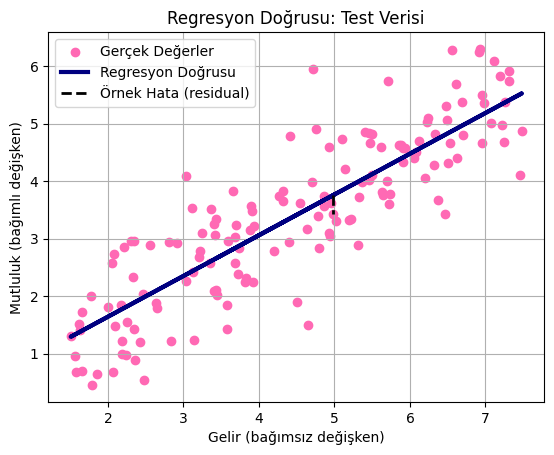

In [ ]:
# Grafik: Gerçek veriler ile modelin tahmin ettiği değerleri aynı grafikte gösteriyoruz

    # plt.scatter(): X ve Y ekseninde noktasal (dağılım) grafik çizer
    # Bu satırda test verisindeki gerçek gözlemleri çiziyoruz
    # test.gelir → X eksenine karşılık gelir (bağımsız değişken)
    # test.mutluluk → Y eksenine karşılık gelir (bağımlı değişken)
    # color → nokta rengi, label → legend (açıklama kutusu) için isim
plt.scatter(test.gelir, test.mutluluk, color="hotpink", label="Gerçek Değerler")


    # plt.plot(): X ve Y değerleri arasında çizgi çizer (burada regresyon doğrusu)
    # test.gelir → X ekseni: modelin girdi olarak kullandığı değerler
    # lr_tahminler → Y ekseni: modelin tahmin ettiği mutluluk puanları
    # linewidth=3 → çizginin kalınlığını artırır, color → çizginin rengini ayarlar
plt.plot(test.gelir, lr_tahminler, color="navy", linewidth=3, label="Regresyon Doğrusu")

# ✅ Ek: Bir gözlem için tahmin hatasını gösteren çizgi
plt.vlines(x=test.gelir.iloc[0], ymin=lr_tahminler.iloc[0], ymax=test.mutluluk.iloc[0],
           color="black", linestyle="--", linewidth=2, label="Örnek Hata (residual)")



# plt.title(): Grafiğin başlığını belirler
plt.title("Regresyon Doğrusu: Test Verisi")

# plt.xlabel(), plt.ylabel(): Eksenlerin açıklamasını ekler
plt.xlabel("Gelir (bağımsız değişken)")     # X ekseni etiketi
plt.ylabel("Mutluluk (bağımlı değişken)")   # Y ekseni etiketi

# plt.legend(): 'label' ile tanımlanan verileri grafik üzerinde açıklayıcı kutu olarak gösterir
plt.legend()

# plt.grid(): Arka planda yardımcı çizgileri gösterir (True = açık)
plt.grid(True)

# plt.show(): Grafiği ekrana bastırır
plt.show()



## Grafik Üzerinden Basit Doğrusal Regresyon Analizi

Aşağıdaki grafik, bir doğrusal regresyon modelinin çıktısıdır.  
Model, bireylerin **gelir düzeyine göre mutluluk puanlarını** tahmin etmektedir.

---

### Regresyon Denklemi

Modelin tahmin denklemi:
```
Y = 0.228 + 0.708 * X
```

- **X**: Gelir (bağımsız değişken)  
- **Y**: Mutluluk (bağımlı değişken, modelin tahmin ettiği)  
- **0.708**: Eğim katsayısı (β₁)  
- **0.228**: Sabit terim (β₀)

---

### 1. Sabit Terim – β₀ = 0.228

- Bu değer, **gelir = 0** olduğunda modelin tahmin ettiği mutluluk puanıdır.
- Grafik üzerinde bu nokta, mavi çizginin teorik olarak **y eksenini kestiği yer**dir.

---

### 2. Eğim Katsayısı – β₁ = 0.708

- Bu değer, **gelir 1 birim arttığında (örneğin 10.000$)** mutluluğun **0.708 puan artacağını** belirtir.
- Grafikte bu, mavi çizginin **yukarı doğru sabit açıda yükselmesi** olarak görünür.

---

### 3. Yerel Eğim = Genel Eğim

- Bu modelde çizgi düzdür, yani her X noktasındaki eğim aynıdır.
- Eğimi her noktada ölçsek yine **0.708** çıkar.
- Dolayısıyla **yerel eğim = genel eğimdir**.

---

### 4. Gerçek Noktalar vs. Model Tahminleri

- **Pembe noktalar**: Gerçek bireylerin ölçülen mutluluk puanları  
- **Mavi çizgi**: Modelin tahmin ettiği değerler  
- **Nokta ile çizgi arasındaki dik mesafe**: Modelin yaptığı **tahmin hatası (residual)**

---

### 5. R² Değeri – Açıklama Oranı

Modelin başarı oranı: `R² = 0.75`

Bu ne anlama gelir?

- Model, mutluluk puanlarındaki değişimin **%75'ini yalnızca gelir ile açıklamaktadır.**
- Grafik üzerinde bu, noktaların çoğunun mavi çizgiye **yakın hizalanmasıyla** görülür.


### 6. Tahmin Hataları Grafik Üzerinde Nasıl Görülür?

- Her bireyin gelirine karşılık gelen **gerçek mutluluk puanı** pembe noktadır.  
- Aynı gelir değeri için modelin verdiği **tahmini mutluluk değeri** mavi çizgi üzerindedir.  
- İki değer arasındaki **dikey mesafe**, modelin o birey için yaptığı **tahmin hatasını (residual)** gösterir.

#### Örnek:
- Gelir = 5 olan bireyin:
  - Gerçek mutluluğu: `4.8`
  - Tahmin edilen: `Y = 0.228 + 0.708 * 5 = 3.768`
  - **Hata = 4.8 - 3.768 = 1.032**

> Bu hata, grafik üzerinde X=5 noktasında **pembe nokta ile mavi çizgi arasındaki dik çizgiyle temsil edilir.**


---

### ✅ Kavramların Grafik Üzerindeki Karşılıkları

| Kavram          | Grafik Üzerindeki Yeri                                | Anlamı                                                        |
|------------------|--------------------------------------------------------|----------------------------------------------------------------|
| **B₀ = 0.228**    | Y eksenini teorik kesim noktası                        | Gelir 0 iken tahmin edilen mutluluk                           |
| **B₁ = 0.708**    | Çizginin sabit eğimi                                  | Gelir arttıkça mutluluk 0.708 puan artar                      |
| **Genel eğim**    | Mavi çizginin tamamı                                   | Sabit artış hızı: her 1 gelir artışında 0.708 puan yukarı     |
| **Yerel eğim**    | Çizgi üzerindeki her nokta                             | Doğrusal olduğu için her noktadaki eğim = 0.708               |
| **Gerçek veriler**| Pembe daireler (scatter noktaları)                    | Gözlemlenen mutluluk puanları                                 |
| **Tahmin**        | Mavi çizgi üzerindeki değer                            | Modelin öngördüğü mutluluk puanları                           |
| **Hata**          | Nokta ile çizgi arasındaki dik mesafe                 | Tahmin edilen ve gerçek değer farkı (residual)                |
| **R² = 0.75**     | Noktaların çizgiye olan yakınlığı                      | Model, mutluluğun %75'ini yalnızca gelir ile açıklıyor        |
